In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [2]:
# generating location vectors
mean0 = [0, 1]
mean1 = [1, 0]
cov = [[1, 0], [0, 1]]

np.random.seed(8) # to fix the location vectors
lv0_x, lv0_y = np.random.multivariate_normal(mean0, cov, 8).T
lv0 = np.vstack((lv0_x, lv0_y)).T
lv1_x, lv1_y = np.random.multivariate_normal(mean1, cov, 8).T
lv1 = np.vstack((lv1_x, lv1_y)).T

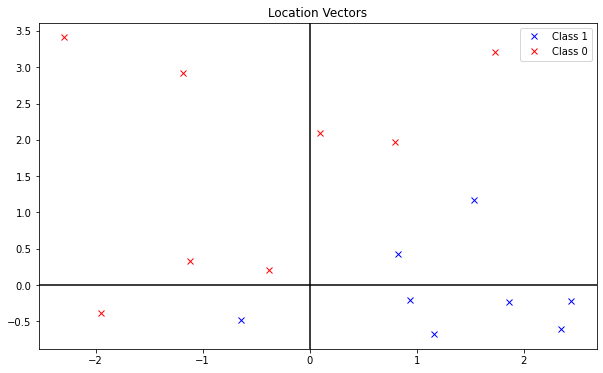

In [3]:
plt.plot(lv1_x, lv1_y, 'x', color='b', label='Class 1');
plt.plot(lv0_x, lv0_y, 'x', color='r', label='Class 0');
plt.title("Location Vectors");
plt.legend();
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

Any linear combination of independent multivariate normals of the same dimension is also multivariate normal (we will use this fact in the next function defintion). Therefore, if we assume $X$ and $Y$ are independent then
$$
Z_{p}=p X+(1-p) Y \sim \mathcal{N}\left(p \mu_{X}+(1-p) \mu_{Y}, p^{2} \Sigma_{X}+(1-p)^{2} \Sigma_{Y}\right)
$$


In [4]:
def generate_points(lv, num_points, pi = 0.5, omega =[1/8]*8, sigma2 = 0.25):
    """
    generates points by randomly selecting a location vector from
    the given class
    """
    samples = np.zeros((num_points, 2))
    cov = [[sigma2, 0], [0, sigma2]]
    for i in range(0, num_points):
        choice = np.random.choice(range(0, len(lv)), p = omega)
        samples[i, :] = np.random.multivariate_normal(lv[choice], cov)
    return samples

In [5]:
np.random.seed(0)

pi = 0.5
k = lv0.shape[0]
omega = [1/k]*k
sigma2 = 0.25
tr_pts = 300
te_pts = 20000

xtrain = np.zeros((tr_pts, 2)) # training data
ytrain = np.zeros(tr_pts) # half points in class 0
ytrain[tr_pts//2:] = [1]*(tr_pts//2) # half in class 1
xtrain[:(tr_pts//2), :] = generate_points(lv0, (tr_pts//2))
xtrain[(tr_pts//2):, :] = generate_points(lv1, (tr_pts//2))

xtest = np.zeros((te_pts, 2)) # test data
ytest = np.zeros(te_pts) # half points in class 0
ytest[te_pts//2:] = [1]*(te_pts//2) # half in class 1
xtest[:te_pts//2, :] = generate_points(lv0, te_pts//2)
xtest[te_pts//2:, :] = generate_points(lv1, te_pts//2)

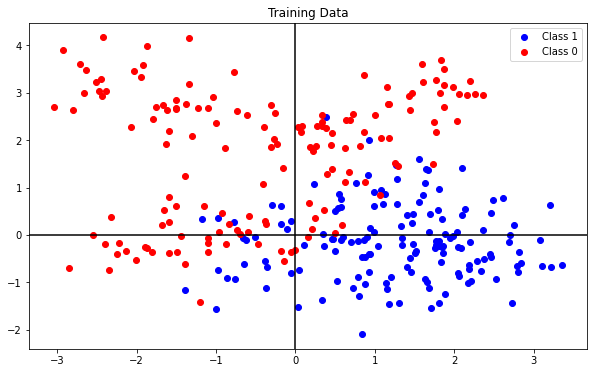

In [6]:
# plot the training data set with classes
half = xtrain.shape[0]//2 
plt.scatter(xtrain[half:,0], xtrain[half:,1], color='blue', label='Class 1')
plt.scatter(xtrain[:half,0], xtrain[:half,1], color='red', label='Class 0')
plt.legend();
plt.title("Training Data");
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

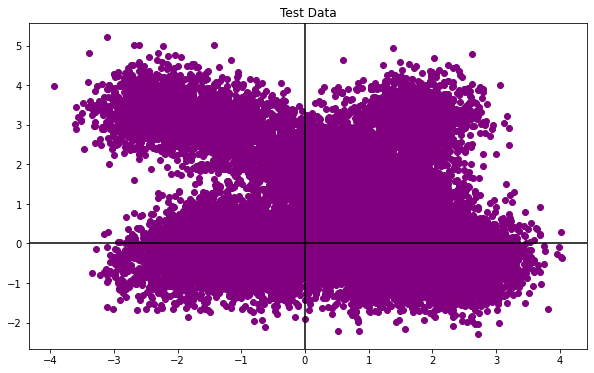

In [7]:
# plot the test data set
plt.scatter(xtest[:,0], xtest[:,1], color='purple')
plt.title("Test Data");
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [8]:
def bayes_classifier(lv0, lv1, sigma2, xtest):
    """
    function to use the bayes classifier to classify the test data which
    returns the probabilities of being in either class
    """
    num_points = xtest.shape[0]
    cov = sigma2*np.eye(lv0.shape[1])
    output = np.zeros((num_points, 2)) # first column is class 0, second is class 1 
    k = lv0.shape[0]
    for i in range(k):
        output[:, 0] += 1/8*multivariate_normal(mean = lv0[i], cov = cov).pdf(xtest)
        output[:, 1] += 1/8*multivariate_normal(mean = lv1[i], cov = cov).pdf(xtest)
    return output

In [9]:
prob = bayes_classifier(lv0, lv1, 0.25, xtest) # apply bayes classifier to test data
prob_sum = np.sum(prob, axis=1)
for i in range(prob.shape[0]): # normalize every row so that probs sum to 1
    prob[i][0] /= prob_sum[i]
    prob[i][1] /= prob_sum[i]

In [10]:
classes = np.argmax(prob, axis=1) # assigned class is the one with higher prob
class0, class1 = [], []
for i in range(classes.shape[0]): # segregate the points for plotting purposes
    if classes[i]==0:
        class0.append([xtest[i][0], xtest[i][1]])
    else:
        class1.append([xtest[i][0], xtest[i][1]])
xs0 = [i[0] for i in class0]
ys0 = [i[1] for i in class0]
xs1 = [i[0] for i in class1]
ys1 = [i[1] for i in class1]

In [11]:
classes = np.argmax(prob, axis=1)
class0, class1 = [], []
for i in range(classes.shape[0]):
    if classes[i]==0:
        class0.append([xtest[i][0], xtest[i][1]])
    else:
        class1.append([xtest[i][0], xtest[i][1]])
xs0 = [i[0] for i in class0]
ys0 = [i[1] for i in class0]
xs1 = [i[0] for i in class1]
ys1 = [i[1] for i in class1]

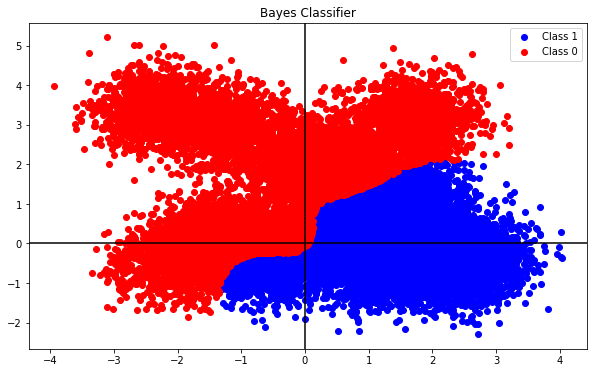

In [12]:
# plot the bayes classifier
plt.scatter(xs1, ys1, color='blue', label='Class 1')
plt.scatter(xs0, ys0, color='red', label='Class 0')
plt.legend();
plt.title("Bayes Classifier");
plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [13]:
max_prob = prob.max(axis = 1) # calculate bayes error
bayes_error = 1 - np.mean(max_prob)
bayes_error

0.07741112517280946

In [14]:
def error(xtrain, ytrain, xtest, ytest, kvec):

    prob = bayes_classifier(lv0, lv1, 0.25, xtest) # bayes error
    prob_sum = np.sum(prob, axis=1)
    for i in range(prob.shape[0]):
        prob[i][0] /= prob_sum[i]
        prob[i][1] /= prob_sum[i]
    max_prob = prob.max(axis = 1)
    bayes_error = 1 - np.mean(max_prob)

    lin_clf = RidgeClassifier(alpha = 0).fit(xtrain, ytrain) # linear model
    y_lin_clf = lin_clf.predict(xtest)
    lin_error = metrics.zero_one_loss(ytest, y_lin_clf) # linear error

    knn_error = []
    for k in kvec: # iterate over different k
        knn_clf = KNeighborsClassifier(k).fit(xtrain, ytrain) # knn model
        y = knn_clf.predict(xtest)
        knn_error.append(metrics.zero_one_loss(ytest, y)) # knn error
    
    return lin_error, knn_error, bayes_error

In [15]:
kvec = range(1, 16, 2)
lin_error, knn_error, bayes_error = error(xtrain, ytrain, xtest, ytest, kvec)

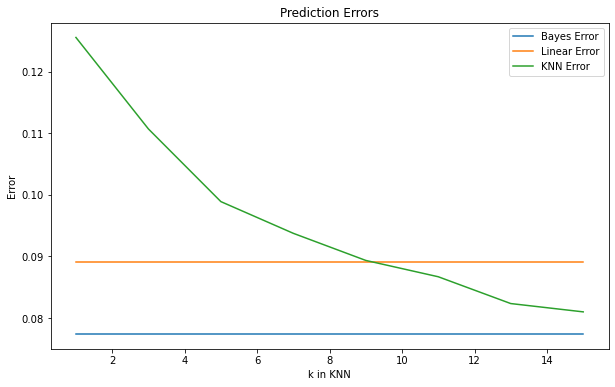

In [16]:
# plot errors
plt.plot(kvec, [bayes_error] * len(kvec), label = 'Bayes Error')
plt.plot(kvec, [lin_error] * len(kvec), label = 'Linear Error')
plt.plot(kvec, knn_error, label = 'KNN Error')

plt.title('Prediction Errors')
plt.xlabel('k in KNN')
plt.ylabel('Error')
plt.legend();
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [17]:
def noisy_error(xtrain, ytrain, xtest, ytest, kvec, num_noise, sig_noise):

    # bayes error does not change with noise and 
    # hence need not be implemented here.

    np.random.seed(0)
    for i in np.arange(num_noise): # add noise variables to x
        xtrain = np.column_stack((xtrain, np.random.normal(0, sig_noise, len(xtrain))))
        xtest = np.column_stack((xtest, np.random.normal(0, sig_noise, len(xtest))))

    lin_clf = RidgeClassifier(alpha = 0).fit(xtrain, ytrain) # linear
    y_lin_clf = lin_clf.predict(xtest)
    lin_error = metrics.zero_one_loss(ytest, y_lin_clf)

    knn_error = []
    for k in kvec:
        knn_clf = KNeighborsClassifier(k).fit(xtrain, ytrain) # knn
        y = knn_clf.predict(xtest)
        knn_error.append(metrics.zero_one_loss(ytest, y))
    
    return lin_error, knn_error

In [18]:
lin_error_noise = []
knn_error_noise = []
bayes_error_noise = []
for i in range(1,11):
    l, k = noisy_error(xtrain, ytrain, xtest, ytest, kvec, i, 1)
    lin_error_noise.append(l)
    knn_error_noise.append(k)
    bayes_error_noise.append(bayes_error)

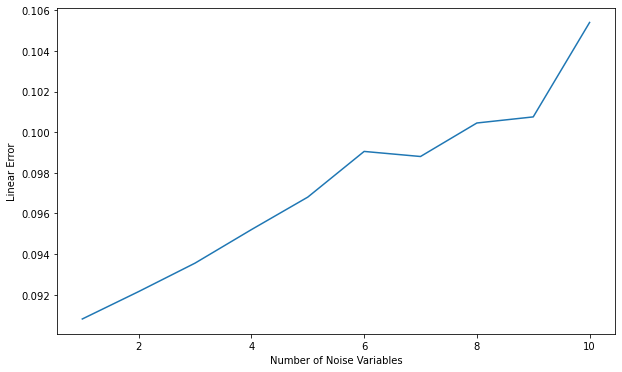

In [19]:
# plot linear error as a function of noise variables
plt.plot(np.arange(1,11), lin_error_noise);
plt.xlabel('Number of Noise Variables')
plt.ylabel('Linear Error')
fig = plt.gcf()
fig.set_size_inches(10, 6);

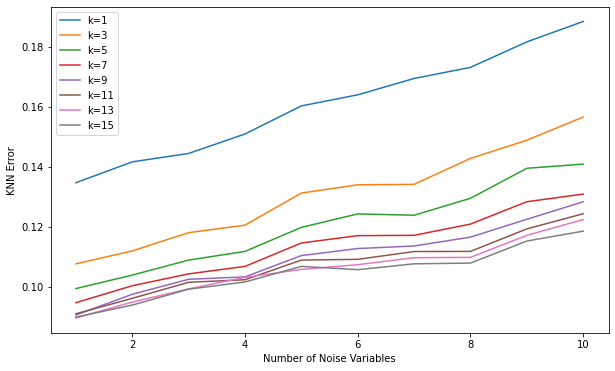

In [20]:
# plot knn error as a function of noise variables for all k
for i in range(len(kvec)):
    plt.plot(np.arange(1,11), [x[i] for x in knn_error_noise], label='k={}'.format(kvec[i]))
plt.xlabel('Number of Noise Variables')
plt.ylabel('KNN Error')
plt.legend();
fig = plt.gcf()
fig.set_size_inches(10, 6);